In [1]:
%run ../utils.ipynb

In [16]:
df1, df2, df3, df4 = load("data.ods").values()
# df1
# df1['Ts'] = df1.T * df1.TD
df1['Ts'] = df1['T']*df1.TD
df1['nu'] = (1/df1.Ts).pint.to('Гц')
df1['dnu'] = (0.1 * df1.TD / u.с**2).pint.to('Гц')
df1['difnu'] = df1.nu1 - df1.nu
# t = df1.dtypes[0]
# f"{t.units:typst}"
make_cols(df1, ['nu_"зг"', 'T, "дел"', '"Time" slash "Div"', 'T', 'nu', 'delta nu', 'nu-nu_"зг"'])
df1 = df1.pint.dequantify()
df1
# mu = 1/Ts
#     dmu = 0.1 * TD
#     difmu = mu1 - mu

df4['lg'] = np.log10(df4.nu.values.quantity.m)
df4['arcsin'] = PA_(np.arcsin((df4.y0/df4.Ay)), u.рад)
df4['dphi'] = df4.arcsin
make_cols(df4, ['nu', 'lg nu, lg "Гц"', 'abs(2 y_0), "дел"', 'abs(2 A_y), "дел"', 'arcsin(y_0/A_y)', 'Delta phi'])
df4 = df4.pint.dequantify()
# df4

df2['K'] = df2.U/5
df2.U = PA_(df2.U * 2, u.В)
make_cols(df2, ['nu', 'U', 'K'])
df2 = df2.pint.dequantify()
# df2

df3['K'] = df3.U/5
df3.U = PA_(df3.U * 2, u.В)
make_cols(df3, ['nu', 'U', '"Режим"', 'K'])
df3 = df3.pint.dequantify()
df3

,nu,U,type,K
,nu,U,"""Режим""",K
unit,"""Гц""","""В""",No Unit,No Unit
0,10,10.3,DC,1.03
1,10,10.1,AC,1.01
2,1,10.8,DC,1.08
3,1,3.1,AC,0.31
4,5,10.4,DC,1.04
5,5,9.0,AC,0.90


In [20]:
save()

In [21]:
Umax = M_(4, 0.1, "В") * 5
Umin = M_(2, 0.1, "В") * 0.005

In [4]:
df1 = df['1'].to_numpy()
df1
# df1['T, с'] = df1['T, дел'] * df1['Time/Div']
# df1['']

array([[1.00e+03, 5.15e+00, 2.00e-04],
       [1.00e+02, 5.15e+00, 2.00e-03],
       [1.00e+06, 5.10e+00, 2.00e-07],
       [1.00e+05, 5.10e+00, 2.00e-06],
       [1.00e+04, 5.10e+00, 2.00e-05]])

In [6]:
df2 = df["2"]
df2

,mu,U
0,10000000,5.0
1,20000000,4.4
2,25000000,3.6
3,28000000,3.3
4,30000000,3.1


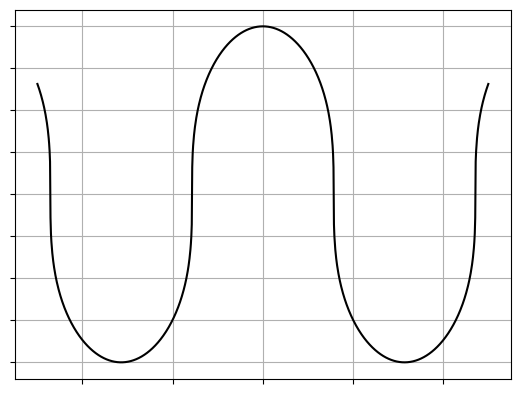

In [100]:
plt.plot()
g = plt.gca()
g.xaxis.set_ticklabels([])
g.yaxis.set_ticklabels([])
plt.savefig('empty.svg')
_x = np.linspace(-5, 5, 1000)
plt.plot(x, np.cbrt(np.cos(_x)))
plt.savefig('path2.svg')

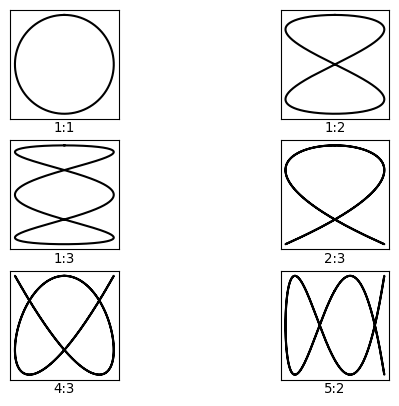

In [20]:

plt.rcParams.update({'font.size': 8})

rats = [
    (1,1,np.pi/2), (1,2,np.pi/2), (1,3,np.pi/2), (2,3,np.pi/2), (4,3,np.pi/2), (5,2,np.pi/4)
]

fig, axs = plt.subplots(3, 2)

for (a, b), ax in np.ndenumerate(axs):
    t = np.linspace(0, 2 * np.pi, 5000)
    rat = rats[a * 2 + b]
    y = np.sin(t * rat[0]+ rat[2])
    x = np.sin(t * rat[1])
    ax.set_aspect(1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.plot(x, y)
    ax.set_title(f"{rat[0]}:{rat[1]}", y=-0.2)

# plt.savefig("plt1.svg")
plt.rcParams.update({'font.size': 14})

,nu,y0,Ay,lg,arcsin,dphi
0,10000,0.00,8.0,4.000000,0.000000,0.000000
1,100000,0.40,7.9,5.000000,0.050655,0.050655
2,200000,0.80,7.8,5.301030,0.102745,0.102745
3,400000,1.60,7.8,5.602060,0.206595,0.206595
4,600000,2.50,7.8,5.778151,0.326271,0.326271
5,800000,3.40,7.7,5.903090,0.457335,0.457335
6,1000000,4.40,7.7,6.000000,0.608246,0.608246
7,1200000,5.05,7.7,6.079181,0.715300,0.715300
8,1400000,5.80,7.7,6.146128,0.852984,0.852984
9,1600000,6.70,7.8,6.204120,1.033263,1.033263


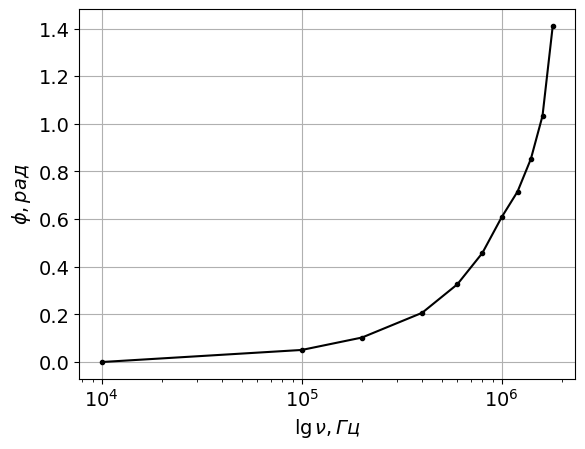

In [10]:
plt.plot(df4['nu'], df4['dphi'], '.')
plt.plot(df4['nu'], df4['dphi'], '-')
plt.xlabel("$\lg \\nu, Гц$")
plt.ylabel("$\phi, рад$")
plt.xscale("log")
plt.savefig('plt2.svg')

In [6]:
save()